<a href="https://colab.research.google.com/github/EdSang24/Machine-Learning-week-1/blob/main/Edward_Sang_Machine_Learnin_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question

**a) Specifying the Question**
You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

**b)Defining the Metrics of Success**

We will focus on creating different train and test sets for our different regression models to either predict game results or classify our independent variables. To achieve this we will use predictor variables that contain data believed to be predictive of the outcome variable.

**c)Understanding the context**

We have the results dataset which has different tournament matches played by the home and away teams and the full time game scores. The fifa ranking dataset has the country rankings which are vital in creating our models.

**d)Recording the Experimental Design**
The workflow will look like this;

1)Data cleaning and preparation

2)Loading libraries and datasets

3)Checking and dealing with missing values

4)Checking and dealing with duplicated values

5)Checking and dealing with outliers and anomalies

6)Perform Exploratory Data Analysis (EDA)

7)Perform any necessary feature engineering

8)Checking for multicollinearity

9)Building our models

10)Cross-validating the models

11)Computing RMSE

12)Assessing the heteroscedasticity of our model using Bartlett’s test

13)Conclusion

**e) Data Relevance**

In [1]:
#Import libraries
#Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

# Loading the Data

In [2]:
#load the dataset
df1= pd.read_csv('/content/fifa_ranking.csv')
df1


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [3]:
df2=pd.read_csv('/content/results.csv')
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


# Data Exploration

In [4]:
# Previewing the top of our fifa ranking dataset

df1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
# Determining the number of records in our fifa ranking dataset

df1.shape

(57793, 16)

In [6]:
# Previewing the top of our results dataset

df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
# Determining the number of records in our results dataset

df2.shape

(40839, 9)

# Checking The Dataset

In [8]:
# Checking for null values in our fifa ranking dataset

df1.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [9]:
# checking for null values in our results dataset

df2.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [10]:
# Checking for duplicates in our fifa ranking dataset

df1.duplicated().sum()

37

In [11]:
# Dropping the duplicates

df1.drop_duplicates(inplace=True)
df2.duplicated().sum()

0

In [12]:
# Checking for duplicates in our results dataset

df2.duplicated().sum()

0

In [13]:
# checking column data types for our fifa ranking dataset

df2.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [14]:
# Changing the rank date column to datetime
df1['rank_date']=pd.to_datetime(df1['rank_date'])

In [15]:
# Changing the column date to datetime

df2['date']=pd.to_datetime(df2['date'])

In [16]:
# Finding the home team ranking

home_merged = df2.merge(df1, left_on=['home_team'], right_on=['country_full'], how='inner')
home_merged.rename(columns={'rank':'home_team_rank'},inplace=True)
home_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_team_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,30,Scotland,SCO,0.0,43,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,28,Scotland,SCO,0.0,41,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,29,Scotland,SCO,0.0,43,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,25,Scotland,SCO,0.0,43,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,24,Scotland,SCO,0.0,45,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-12-23


In [17]:
# Finding the away team rank
away_merged = df2.merge(df1, left_on=['away_team'], right_on=['country_full'], how='inner')
away_merged.rename(columns={'rank':'away_team_rank'},inplace=True)
away_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,away_team_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,England,ENG,0.0,55,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,5,England,ENG,0.0,52,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,10,England,ENG,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,8,England,ENG,0.0,54,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,England,ENG,0.0,56,-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-12-23


In [18]:
# Creating a new year column to reduce the size of the dataset
home_merged['date']=pd.to_datetime(home_merged['date'])
away_merged['date']=pd.to_datetime(away_merged['date'])

home_merged['year']=home_merged['date'].dt.year
away_merged['year']=away_merged['date'].dt.year

In [19]:
# selecting years from 2010 and games played as a friendly or a world cup match

home_merged=home_merged[(home_merged['year'] > 2009) & (home_merged['tournament'].isin(['Friendly','World Cup']))]
away_merged=away_merged[(away_merged['year'] > 2009) & (away_merged['tournament'].isin(['Friendly','World Cup']))]

print(home_merged.shape)
print(away_merged.shape)

(855416, 26)
(844782, 26)


In [20]:
# Selecting the required columns

home_merged=home_merged[['home_team','home_score','away_team','away_score','home_team_rank','tournament']]
home_merged

,home_team,home_score,away_team,away_score,home_team_rank,tournament
96096,Scotland,1,Czech Republic,0,30,Friendly
96097,Scotland,1,Czech Republic,0,28,Friendly
96098,Scotland,1,Czech Republic,0,29,Friendly
96099,Scotland,1,Czech Republic,0,25,Friendly
96100,Scotland,1,Czech Republic,0,24,Friendly
...,...,...,...,...,...,...
10268802,Myanmar,0,Indonesia,2,142,Friendly
10268803,Myanmar,0,Indonesia,2,142,Friendly
10268804,Myanmar,0,Indonesia,2,135,Friendly
10268805,Myanmar,0,Indonesia,2,135,Friendly


In [21]:
# Selecting the required columns
away_merged=away_merged[['home_team','home_score','away_team','away_score','away_team_rank','tournament']]
away_merged

,home_team,home_score,away_team,away_score,away_team_rank,tournament
129844,Japan,1,England,2,11,Friendly
129845,Japan,1,England,2,5,Friendly
129846,Japan,1,England,2,10,Friendly
129847,Japan,1,England,2,8,Friendly
129848,Japan,1,England,2,11,Friendly
...,...,...,...,...,...,...
10191007,Singapore,1,Myanmar,2,142,Friendly
10191008,Singapore,1,Myanmar,2,142,Friendly
10191009,Singapore,1,Myanmar,2,135,Friendly
10191010,Singapore,1,Myanmar,2,135,Friendly


In [22]:
#reducing the dataset sample using tounament column on the home_merged dataset

home_merged=home_merged.groupby('tournament', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.001169))
home_merged

,home_team,home_score,away_team,away_score,home_team_rank,tournament
3371825,Romania,2,Finland,0,26,Friendly
332926,Wales,1,Northern Ireland,1,59,Friendly
8585340,Jordan,1,Kuwait,0,47,Friendly
10142353,Czech Republic,1,Austria,2,3,Friendly
5019217,Republic of Ireland,1,Czech Republic,1,26,Friendly
...,...,...,...,...,...,...
8061461,Iraq,1,Syria,1,82,Friendly
7980071,Cyprus,3,Moldova,2,75,Friendly
6942744,Malaysia,1,Bangladesh,1,142,Friendly
8787193,Bahrain,0,Lebanon,0,137,Friendly


In [23]:
# doing the same for the away_merged dataset

away_strat = away_merged.groupby('tournament', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.0011837))
away_strat

,home_team,home_score,away_team,away_score,away_team_rank,tournament
5164679,Saint Vincent and the Grenadines,1,Barbados,1,127,Friendly
8711161,United Arab Emirates,4,Laos,0,170,Friendly
9411801,Qatar,0,Oman,0,84,Friendly
6830898,Saudi Arabia,0,Ghana,0,22,Friendly
8986038,Kuwait,4,Bahrain,1,126,Friendly
...,...,...,...,...,...,...
9926125,Azerbaijan,0,Uzbekistan,0,83,Friendly
10061778,Turkey,2,Czech Republic,1,10,Friendly
6088886,Brazil,2,Zambia,0,72,Friendly
9245136,Norway,0,United Arab Emirates,0,98,Friendly


In [24]:
# merging the two dataframes

merged=home_merged.merge(away_merged,how='inner', on=['home_team','away_team','tournament','home_score','away_team','away_score'])
merged

,home_team,home_score,away_team,away_score,home_team_rank,tournament,away_team_rank
0,Romania,2,Finland,0,26,Friendly,47
1,Romania,2,Finland,0,26,Friendly,50
2,Romania,2,Finland,0,26,Friendly,45
3,Romania,2,Finland,0,26,Friendly,44
4,Romania,2,Finland,0,26,Friendly,45
...,...,...,...,...,...,...,...
273035,Cyprus,3,Moldova,2,75,Friendly,166
273036,Cyprus,3,Moldova,2,75,Friendly,170
273037,Cyprus,3,Moldova,2,75,Friendly,173
273038,Cyprus,3,Moldova,2,75,Friendly,173


In [25]:
merged.duplicated().sum()

211278

In [26]:
merged.drop_duplicates(inplace=True)
merged.shape

(61762, 7)

In [27]:
# Creating a sample of 10,000 using the tournament column


merged = merged.groupby('tournament', group_keys=False).apply(lambda grouped_subset:grouped_subset.sample(frac=0.1636))
merged

,home_team,home_score,away_team,away_score,home_team_rank,tournament,away_team_rank
19913,Nicaragua,0,Guatemala,1,139,Friendly,84
162505,Iraq,0,United Arab Emirates,0,70,Friendly,76
86629,Slovenia,2,Australia,0,79,Friendly,52
213869,Russia,0,Kazakhstan,0,23,Friendly,117
59150,Equatorial Guinea,3,Central African Republic,0,161,Friendly,71
...,...,...,...,...,...,...,...
267345,Costa Rica,2,El Salvador,1,61,Friendly,143
178841,Northern Ireland,3,Finland,3,62,Friendly,49
74197,Jamaica,1,Peru,2,48,Friendly,10
225201,Lebanon,1,Jordan,1,112,Friendly,108


In [28]:
# Creating a new column 'status' for classification

condition=[
           (merged['home_score']==merged['away_score']),
           (merged['home_score']>merged['away_score']),
           (merged['home_score']<merged['away_score'])
]
values=['draw', 'win', 'lose']
merged['status']=np.select(condition, values)
merged

,home_team,home_score,away_team,away_score,home_team_rank,tournament,away_team_rank,status
19913,Nicaragua,0,Guatemala,1,139,Friendly,84,lose
162505,Iraq,0,United Arab Emirates,0,70,Friendly,76,draw
86629,Slovenia,2,Australia,0,79,Friendly,52,win
213869,Russia,0,Kazakhstan,0,23,Friendly,117,draw
59150,Equatorial Guinea,3,Central African Republic,0,161,Friendly,71,win
...,...,...,...,...,...,...,...,...
267345,Costa Rica,2,El Salvador,1,61,Friendly,143,win
178841,Northern Ireland,3,Finland,3,62,Friendly,49,draw
74197,Jamaica,1,Peru,2,48,Friendly,10,lose
225201,Lebanon,1,Jordan,1,112,Friendly,108,draw


# Tyding Our Dataset

In [29]:
#encoding our tournament column

from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
merged['tournament']=en.fit_transform(merged['tournament'])

In [30]:
# Encoding column status using get dummies since we have more than two categories.

status_df=pd.get_dummies(merged['status'])
merged=merged.join(status_df)
merged.head()

,home_team,home_score,away_team,away_score,home_team_rank,tournament,away_team_rank,status,draw,lose,win
19913,Nicaragua,0,Guatemala,1,139,0,84,lose,0,1,0
162505,Iraq,0,United Arab Emirates,0,70,0,76,draw,1,0,0
86629,Slovenia,2,Australia,0,79,0,52,win,0,0,1
213869,Russia,0,Kazakhstan,0,23,0,117,draw,1,0,0
59150,Equatorial Guinea,3,Central African Republic,0,161,0,71,win,0,0,1


Encoding helps to include our categorical independent variables in our model.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


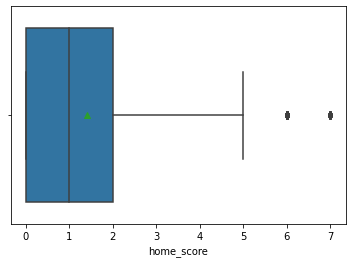

In [31]:
# Checking for outliers in our columns
sns.boxplot(merged['home_score'], showmeans=True)

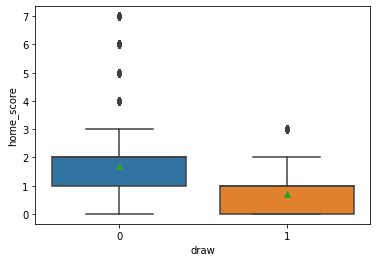

In [32]:
sns.boxplot(data=merged,x='draw',y='home_score',showmeans=True)

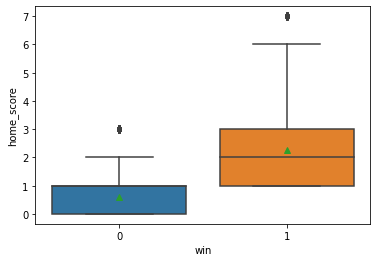

In [33]:
sns.boxplot(data=merged, x='win', y='home_score', showmeans=True)

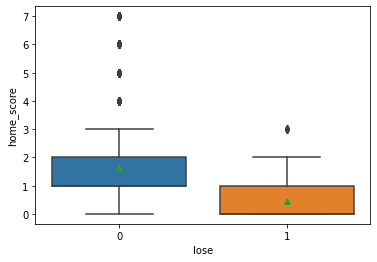

In [34]:
sns.boxplot(data=merged,x='lose',y='home_score',showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


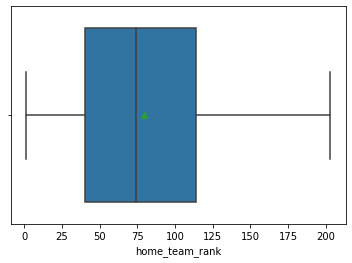

In [35]:
sns.boxplot(merged['home_team_rank'], showmeans=True)

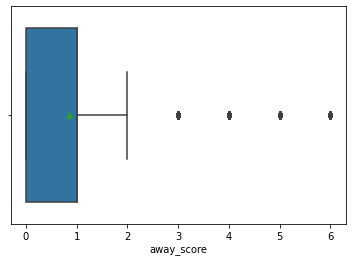

In [36]:
sns.boxplot(x=merged['away_score'],showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


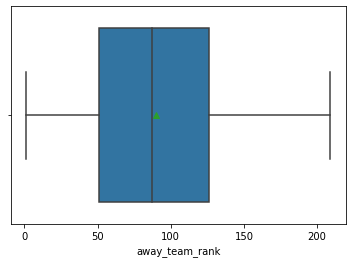

In [37]:
sns.boxplot(merged['away_team_rank'],showmeans=True)

# Exploratoy Data Analysis

Univariate Visualizations

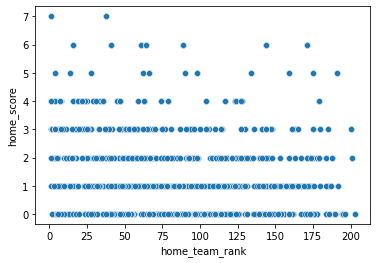

In [38]:
sns.scatterplot(data=merged, x='home_team_rank',y='home_score')

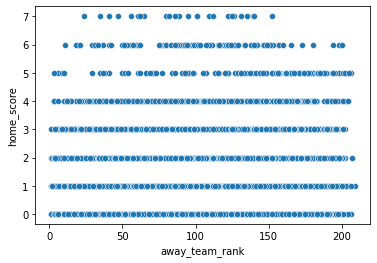

In [39]:
sns.scatterplot(data=merged,x='away_team_rank',y='home_score')

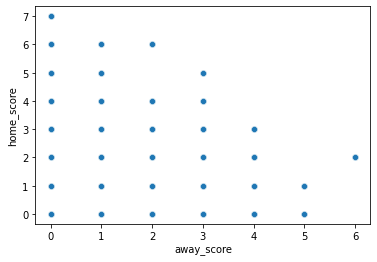

In [40]:
sns.scatterplot(data=merged,x='away_score', y='home_score')

**Predicting Scores by the Home Team**

In [41]:
# dropping unnecessary columns

merged.drop(['home_team','away_team','tournament'],axis=1,inplace=True)
merged

,home_score,away_score,home_team_rank,away_team_rank,status,draw,lose,win
19913,0,1,139,84,lose,0,1,0
162505,0,0,70,76,draw,1,0,0
86629,2,0,79,52,win,0,0,1
213869,0,0,23,117,draw,1,0,0
59150,3,0,161,71,win,0,0,1
...,...,...,...,...,...,...,...,...
267345,2,1,61,143,win,0,0,1
178841,3,3,62,49,draw,1,0,0
74197,1,2,48,10,lose,0,1,0
225201,1,1,112,108,draw,1,0,0


In [42]:
#creating our independent variable and dependent variable
independent=merged.drop(['home_score','status'], axis=1)
X=independent.values
y=merged['home_score'].values

In [43]:
#using correlation between the variables to find VIF score

correlations = independent.corr()
correlations
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,away_score,home_team_rank,away_team_rank,draw,lose,win
away_score,1.693289,-0.008036,0.072737,6.760328e+00,5.227219e+00,7.561794e+00
home_team_rank,-0.008036,1.354926,-0.650295,6.480944e+00,5.620646e+00,7.252827e+00
away_team_rank,0.072737,-0.650295,1.333722,-5.134633e+00,-4.471530e+00,-5.749117e+00
draw,6.680219,6.393680,-5.093143,2.564881e+15,2.289141e+15,2.775031e+15
lose,5.044434,5.505853,-4.382917,2.289141e+15,2.043045e+15,2.476699e+15
win,7.485103,7.108539,-5.644882,2.775031e+15,2.476699e+15,3.002400e+15


In [44]:
# dropping win column since it has a high VIF score

new = independent.drop(columns=['win'])

correlations =new.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,away_score,home_team_rank,away_team_rank,draw,lose
away_score,1.693289,-0.008036,0.072737,-0.238046,-1.130076
home_team_rank,-0.008036,1.354926,-0.650295,-0.176537,-0.358027
away_team_rank,0.072737,-0.650295,1.333722,0.124257,0.273582
draw,-0.238046,-0.176537,0.124257,1.199367,0.613522
lose,-1.130076,-0.358027,0.273582,0.613522,2.013325


# Linear Regression

In [45]:
# Using the independent and dependent variables to predict the home score

X=new.values
y=merged['home_score'].values
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Linear Regression model to the dataset
reg_line = LinearRegression()
reg_line.fit(X,y)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,2021.000000,2021.000000
mean,1.406729,1.405392
std,1.244725,0.944115
min,0.000000,-0.429432
25%,0.000000,0.513735
50%,1.000000,1.553866
75%,2.000000,2.074307
max,7.000000,3.905521


In [46]:
# evaluating the algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.5441325173770832
Mean Squared Error: 0.6372964116258097
Root Mean Squared Error: 0.7983084689678607


In [47]:
print(y_test.max())
print(y_test.min())

#our dependent variable ranges from 0 to 7
#The model has an RMSE of 0.91

7
0


# Polynomial Regression

In [48]:
# Label encoding our status column
merged['status']=en.fit_transform(merged['status'])
merged.corr()

,home_score,away_score,home_team_rank,away_team_rank,status,draw,lose,win
home_score,1.000000,-0.025298,-0.169842,0.097652,0.570378,-0.362385,-0.391138,0.657595
away_score,-0.025298,1.000000,0.098273,-0.125992,-0.196768,-0.093386,0.624352,-0.428718
home_team_rank,-0.169842,0.098273,1.000000,0.445676,-0.116882,0.038288,0.160761,-0.168001
away_team_rank,0.097652,-0.125992,0.445676,1.000000,0.058048,0.002530,-0.128122,0.103350
status,0.570378,-0.196768,-0.116882,0.058048,1.000000,-0.896056,-0.101517,0.911941
draw,-0.362385,-0.093386,0.038288,0.002530,-0.896056,1.000000,-0.350683,-0.634990
lose,-0.391138,0.624352,0.160761,-0.128122,-0.101517,-0.350683,1.000000,-0.500780
win,0.657595,-0.428718,-0.168001,0.103350,0.911941,-0.634990,-0.500780,1.000000


In [49]:
# Splitting the dataset into train and test sets

X=merged['status'].values.reshape(-1,1)
y=merged['home_score'].values.reshape(-1,1)

# Training using 80% of our data
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [50]:
# Fitting the polynomial Regression to the dataset with two degrees of freedom
poly_reg = PolynomialFeatures(degree = 5) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


pol_reg.predict(poly_reg.fit_transform([[2]]))

array([[2.27371855]])

# Cross Validation

We will perform cross_validation using KFolds with 5 folds 

In [51]:
from sklearn.model_selection import KFold

X=new.values
y=merged['home_score'].values

folds = KFold(n_splits=5)

# using get_n_splits to figure out how many folds we set up
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# Assessing the 5 models based on the folds we created.
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# set up the train and test based on the split determined by KFold
# With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set.
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  X_train, X_test
# fitting a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
# Assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.7745223590569363

Training model 2
Model 2 Root Mean Squared Error: 0.821949757044887

Training model 3
Model 3 Root Mean Squared Error: 0.8209696090159642

Training model 4
Model 4 Root Mean Squared Error: 0.8212300943749167

Training model 5
Model 5 Root Mean Squared Error: 0.8242394077874913


The RMSE in our initial model is the 5th model since it is the highest after model 2, 3 and 4 . Of all the models we should go with model 1 since it has the lowest RMSE.

We'll use the Bartlett's test to perform heteroskedacity to pove that our esiduals are centred around mean

In [52]:
import scipy as sp

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

2487.4768147174295
the variances are homogeneous!


**Predicting Scores by the Away Team**

In [53]:
# Creating our independent variable X, and dependent variable y

independent=merged.drop(['away_score','status'], axis=1)
X=independent.values
y=merged['away_score'].values

In [54]:
# fidding correlations between the variables
correlations = independent.corr()
correlations
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,home_team_rank,away_team_rank,draw,lose,win
home_score,1.797543,0.156505,-0.117908,-1.063116e+01,-9.442755e+00,-1.267615e+01
home_team_rank,0.156505,1.368514,-0.660215,3.948904e+00,3.311317e+00,4.364919e+00
away_team_rank,-0.117908,-0.660215,1.338332,-3.387079e+00,-2.814016e+00,-3.702865e+00
draw,-10.756879,3.990022,-3.407119,1.923661e+15,1.716856e+15,2.081273e+15
lose,-9.480137,3.366723,-2.846624,1.716856e+15,1.532284e+15,1.857524e+15
win,-12.721555,4.414843,-3.760719,2.081273e+15,1.857524e+15,2.251800e+15


In [55]:
new = independent.drop(columns=['win'])

correlations =new.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,home_team_rank,away_team_rank,draw,lose
home_score,1.797543,0.156505,-0.117908,1.001286,1.013955
home_team_rank,0.156505,1.368514,-0.660215,-0.090489,-0.275109
away_team_rank,-0.117908,-0.660215,1.338332,0.068805,0.255617
draw,1.001286,-0.090489,0.068805,1.723648,1.019458
lose,1.013955,-0.275109,0.255617,1.019458,1.831080


In [56]:
# Using the independent and dependent variables to predict the home score

X=new.values
y=merged['away_score'].values
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Linear Regression model to the dataset
reg_line = LinearRegression()
reg_line.fit(X,y)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,2021.000000,2021.000000
mean,0.850569,0.849080
std,0.972613,0.729541
min,0.000000,-0.251945
25%,0.000000,0.315548
50%,1.000000,0.734971
75%,1.000000,1.236869
max,6.000000,3.007541


In [57]:
# evaluating the algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.47512911225240695
Mean Squared Error: 0.40362485658521513
Root Mean Squared Error: 0.6353147696891794


In [58]:
print(y_test.max())
print(y_test.min())

6
0


In [59]:
# cross_validation using 5 folds

from sklearn.model_selection import KFold

X=new.values
y=merged['away_score'].values

folds = KFold(n_splits=5)

# using get_n_splits to figure out how many folds we set up
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# Assessing the 5 models based on the folds we created.
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# set up the train and test based on the split determined by KFold
# With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set.
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  X_train, X_test
# fitting a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
# Assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.6633142433475713

Training model 2
Model 2 Root Mean Squared Error: 0.6372960266279993

Training model 3
Model 3 Root Mean Squared Error: 0.6738441890858061

Training model 4
Model 4 Root Mean Squared Error: 0.6646956897776815

Training model 5
Model 5 Root Mean Squared Error: 0.643080527084553


Our RMSE is 0.635. Thus we should pick model 2 since it has the lowest RMSE

In [60]:
#performing the bartlett's test

import scipy as sp

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

2452.733511027864
the variances are homogeneous!


We should accept the null hypothesis as the variance is centred around the mean

# Logistic Regression

We will use the home team as the dependent variable

In [61]:
merged.head()

,home_score,away_score,home_team_rank,away_team_rank,status,draw,lose,win
19913,0,1,139,84,1,0,1,0
162505,0,0,70,76,0,1,0,0
86629,2,0,79,52,2,0,0,1
213869,0,0,23,117,0,1,0,0
59150,3,0,161,71,2,0,0,1


In [62]:
# Label encoding our status column
merged['status']=en.fit_transform(merged['status'])

In [63]:
# Checking for independence in our variables

features=merged[['home_score','away_score','home_team_rank','away_team_rank']]
features
correlations =features.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.072009,-0.031587,0.291506,-0.238581
away_score,-0.031587,1.048744,-0.210503,0.229034
home_team_rank,0.291506,-0.210503,1.366035,-0.663796
away_team_rank,-0.238581,0.229034,-0.663796,1.347992


The VIF scores are low thus the variables are independent of each other

In [64]:
merged.head()

,home_score,away_score,home_team_rank,away_team_rank,status,draw,lose,win
19913,0,1,139,84,1,0,1,0
162505,0,0,70,76,0,1,0,0
86629,2,0,79,52,2,0,0,1
213869,0,0,23,117,0,1,0,0
59150,3,0,161,71,2,0,0,1


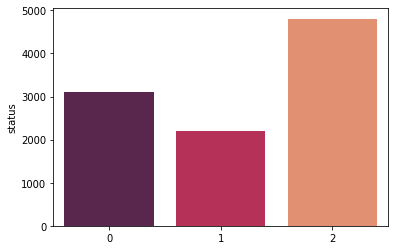

In [65]:
status=merged['status'].value_counts()
sns.barplot(data=merged, x=status.index, y=status, palette='rocket')

This is a multinomial logistic regression with 0 as a draw, 1 is a lose and 2 as a win

In [66]:
#training our dataset
# Splitting our dataset and creating our model

X=merged.iloc[:, 0:4].values
y=merged.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Fitting our model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
y_pred = LogReg.predict(X_test)

# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[ 924,    0,    0],
       [   0,  677,    0],
       [   0,    0, 1431]])

From the confusion matrix we have 924,677 and 1431 as our correct prediction and no incorrect predictions

In [67]:
# performing hyperparameter tuning

from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

X=merged.iloc[:, 0:4].values
y=merged.iloc[:, 4].values

# Creating the logistic regression
logistic = linear_model.LogisticRegression()

# Creating regularization penalty space
penalty = ['l1', 'l2']
# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fitting grid search
best_model = clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [68]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [69]:
# Predicting target vector
best_model.predict(X)

array([1, 0, 2, ..., 1, 0, 0])


We also have a classifying model which predicts whether a team will win, lose or draw. also having created our predictive models, we can use our initial models or one of our k-fold models in predicting a new set. 